# Logistic unit in NumPy

> Блок с отступами




* In this task you are supposed to implement forward and backward passes for logistic unit in `forward_backward_pass` function and also the `predict` function.
* You can use all other avaliable `LogisticRegression`'s methods and you don't have to modify them.
* Using additional modules is prohibited.

In [1]:
# this is that you can use
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
accuracy_score([1, 1, 0, 0, 1],[0, 1, 0, 0, 0]) #пример вычета точности по векторам.

0.6

In [3]:
np.random.randn(1, 5)

array([[-0.54456446, -1.31708096,  1.29127602, -0.65353732,  0.4967984 ]])

In [5]:
x = np.array([1, 2, 3]).reshape(3, 1)

In [13]:
class LogisticRegression:
    def __init__(self):
        # variables for storing weights
        self.W, self.b = None, None
        # variable for storing current loss 
        self.loss = None
        
    def cost_function(self, p, y):
        # cost function (log loss) 
        # Кросс-энтропия(функция ошибки)
        return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p) )
        
    def _init_weights(self):
        # initialize normal
        self.W = np.random.randn(3, 1) 
        self.b = np.random.randn()
        
    def sigm(self, x):
        # sigmoid (logistic) function
        return 1 / (1 + np.exp(-x))
            
    def forward_backward_pass(self, x, y, eta):
        """
        This function implements forward and backward pass and updates parameters W and b

        """
        # FORWARD
        linear_pred = np.dot(x, self.W) + self.b
        y_pred = self.sigm(linear_pred)
        # FORWARD ENDS
        
        # calculate loss 
        self.loss = self.cost_function(y_pred, y)
        
        
        # BACKWARD
        # here you need to calculate all the derivatives of loss with respect to W and b
        
        dLdW = (y_pred - y) * x.T 
        dLdb = (y_pred - y)
        
        # then update W and b
        # don't forget the learning rate - 'eta'!
        # Из наших переменных(вес, байс)
        self.W = self.W - eta * dLdW
        self.b = self.b - eta * dLdb
        
        # BACKWARD ENDS
        

        
    def fit(self, X, Y, eta=0.01, decay=0.999, iters=1000):
        self._init_weights()
        
        # buffer - for printing out mean loss over 100 iterations
        buffer = []
        # L - history of losses
        L = []
        # A - acc history 
        A = []
        
        # perform iterative gradient descent
        for i in range(iters):
            index = np.random.randint(0, len(X))
            x = X[index]
            y = Y[index]
            # update params
            self.forward_backward_pass(x, y, eta)
            # update learning rate
            eta *= decay
            
            L.append(self.loss)
            buffer.append(self.loss)
            #acc = accuracy_score(y, self.predict(X))

            #A.append(acc)
            if i % 100 == 0:
                print('Mean log loss:', np.mean(buffer))
                buffer = []
        
        return A, L
    
    def predict(self, x):
        # Note you have to return actual classes (not probs)
        linear_pred = np.dot(x, self.W) + self.b
        y_pred = self.sigm(linear_pred)
        return np.round(y_pred)

# Let's check how your model performs

In [17]:
# generate some synthetic data with 10 features
X = np.random.randn(100, 3) 
y = np.array(list(map(lambda x: np.sum(x) > 0, X))).reshape(-1, 1).astype(np.int32)

log_reg = LogisticRegression()
# feel free to play with fit params
acc, losses = log_reg.fit(X, y, iters=1000)

Mean log loss: 0.30457346586620226
Mean log loss: 0.24503377970386442
Mean log loss: 0.2401903874457774
Mean log loss: 0.1856912512778231
Mean log loss: 0.22705838424288
Mean log loss: 0.23750868541510997
Mean log loss: 0.1974266827345646
Mean log loss: 0.20814498393531694
Mean log loss: 0.19535494273482626
Mean log loss: 0.21158602459394213


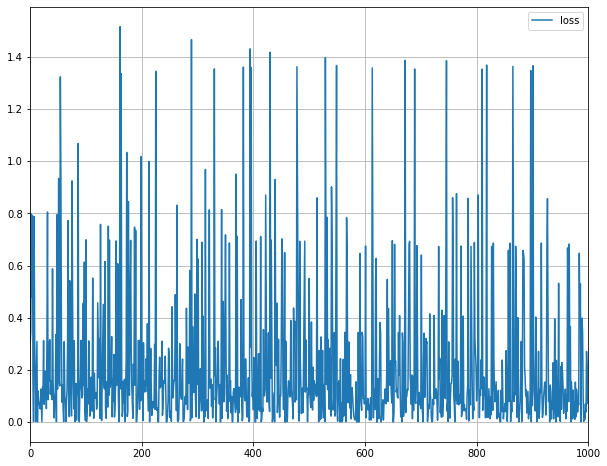

In [18]:
plt.figure(figsize=(10, 8))
''
''
plt.plot(losses, label='loss')
plt.xlim(0, len(losses))
plt.grid()
plt.legend()
plt.show()